In [19]:
import pandas as pd
import numpy as np

In [20]:
df = pd.read_csv('sleep_lifestyle.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [21]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [23]:
df = df.drop(columns=['Person ID'])
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [24]:
# make all the headings lowercase and replace spaces with underscores
df.columns = [col.lower().replace(' ','_') for col in df.columns]
df.head()

,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [25]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
numerical_cols = [col for col in df.columns if df[col].dtype != 'object']

In [26]:
categorical_cols

['gender', 'occupation', 'bmi_category', 'blood_pressure', 'sleep_disorder']

In [27]:
df['blood_pressure']

0      126/83
1      125/80
2      125/80
3      140/90
4      140/90
        ...  
369    140/95
370    140/95
371    140/95
372    140/95
373    140/95
Name: blood_pressure, Length: 374, dtype: object

In [28]:
# blood pressure is written as systolic/diastolic
# we will split it into two columns
df[['systolic_bp', 'diastolic_bp']] = df['blood_pressure'].str.split('/', expand= True)
df.head()

,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder,systolic_bp,diastolic_bp
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90


In [29]:
# drop the original blood_pressure column
df = df.drop(columns=['blood_pressure'])

In [30]:
df.head()

,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,heart_rate,daily_steps,sleep_disorder,systolic_bp,diastolic_bp
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NaN,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   374 non-null    object 
 1   age                      374 non-null    int64  
 2   occupation               374 non-null    object 
 3   sleep_duration           374 non-null    float64
 4   quality_of_sleep         374 non-null    int64  
 5   physical_activity_level  374 non-null    int64  
 6   stress_level             374 non-null    int64  
 7   bmi_category             374 non-null    object 
 8   heart_rate               374 non-null    int64  
 9   daily_steps              374 non-null    int64  
 10  sleep_disorder           155 non-null    object 
 11  systolic_bp              374 non-null    object 
 12  diastolic_bp             374 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 38.1+ KB


In [33]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
numerical_cols = [col for col in df.columns if df[col].dtype != 'object']

In [35]:
print('categorical_cols:', categorical_cols)
print('numerical_cols:', numerical_cols)

categorical_cols: ['gender', 'occupation', 'bmi_category', 'sleep_disorder', 'systolic_bp', 'diastolic_bp']
numerical_cols: ['age', 'sleep_duration', 'quality_of_sleep', 'physical_activity_level', 'stress_level', 'heart_rate', 'daily_steps']


In [38]:
# convert the columns systolic_bp and diastolic_bp to numeric
df['systolic_bp'] = pd.to_numeric(df['systolic_bp'], errors='coerce')
df['diastolic_bp'] = pd.to_numeric(df['diastolic_bp'], errors='coerce')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   374 non-null    object 
 1   age                      374 non-null    int64  
 2   occupation               374 non-null    object 
 3   sleep_duration           374 non-null    float64
 4   quality_of_sleep         374 non-null    int64  
 5   physical_activity_level  374 non-null    int64  
 6   stress_level             374 non-null    int64  
 7   bmi_category             374 non-null    object 
 8   heart_rate               374 non-null    int64  
 9   daily_steps              374 non-null    int64  
 10  sleep_disorder           155 non-null    object 
 11  systolic_bp              374 non-null    int64  
 12  diastolic_bp             374 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 38.1+ KB


In [42]:
# sleep_disorder has NaN value that can be filled with 0 for one-hot encodings
df['sleep_disorder'] = df['sleep_disorder'].fillna(0)  # 0 means already False

In [43]:
# sleep_disorder can be one-hot encoded
df_processed = pd.get_dummies(df, columns=['sleep_disorder'], drop_first=True)
df_processed.head()

,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,heart_rate,daily_steps,systolic_bp,diastolic_bp,sleep_disorder_Insomnia,sleep_disorder_Sleep Apnea
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,126,83,False,False
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80,False,False
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80,False,False
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140,90,False,True
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140,90,False,True


In [44]:
df_processed = pd.get_dummies(df_processed, columns=['occupation', 'bmi_category', 'gender'], drop_first=True)
df_processed.head()

,age,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,heart_rate,daily_steps,systolic_bp,diastolic_bp,sleep_disorder_Insomnia,...,occupation_Nurse,occupation_Sales Representative,occupation_Salesperson,occupation_Scientist,occupation_Software Engineer,occupation_Teacher,bmi_category_Normal Weight,bmi_category_Obese,bmi_category_Overweight,gender_Male
0,27,6.1,6,42,6,77,4200,126,83,False,...,False,False,False,False,True,False,False,False,True,True
1,28,6.2,6,60,8,75,10000,125,80,False,...,False,False,False,False,False,False,False,False,False,True
2,28,6.2,6,60,8,75,10000,125,80,False,...,False,False,False,False,False,False,False,False,False,True
3,28,5.9,4,30,8,85,3000,140,90,False,...,False,True,False,False,False,False,False,True,False,True
4,28,5.9,4,30,8,85,3000,140,90,False,...,False,True,False,False,False,False,False,True,False,True


In [45]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              374 non-null    int64  
 1   sleep_duration                   374 non-null    float64
 2   quality_of_sleep                 374 non-null    int64  
 3   physical_activity_level          374 non-null    int64  
 4   stress_level                     374 non-null    int64  
 5   heart_rate                       374 non-null    int64  
 6   daily_steps                      374 non-null    int64  
 7   systolic_bp                      374 non-null    int64  
 8   diastolic_bp                     374 non-null    int64  
 9   sleep_disorder_Insomnia          374 non-null    bool   
 10  sleep_disorder_Sleep Apnea       374 non-null    bool   
 11  occupation_Doctor                374 non-null    bool   
 12  occupation_Engineer   

In [46]:
df_processed.columns

Index(['age', 'sleep_duration', 'quality_of_sleep', 'physical_activity_level',
       'stress_level', 'heart_rate', 'daily_steps', 'systolic_bp',
       'diastolic_bp', 'sleep_disorder_Insomnia', 'sleep_disorder_Sleep Apnea',
       'occupation_Doctor', 'occupation_Engineer', 'occupation_Lawyer',
       'occupation_Manager', 'occupation_Nurse',
       'occupation_Sales Representative', 'occupation_Salesperson',
       'occupation_Scientist', 'occupation_Software Engineer',
       'occupation_Teacher', 'bmi_category_Normal Weight',
       'bmi_category_Obese', 'bmi_category_Overweight', 'gender_Male'],
      dtype='object')

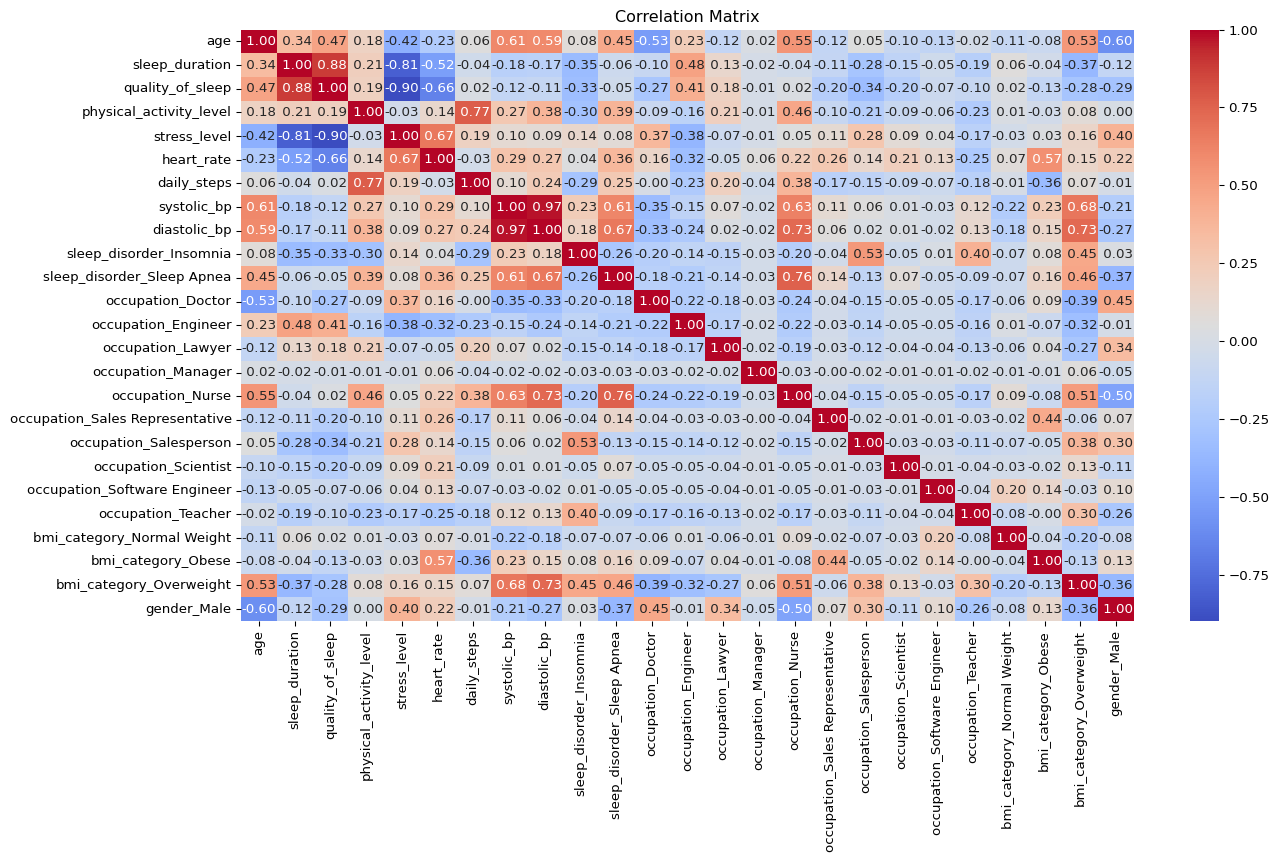

In [50]:
corr = df_processed.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8), dpi= 96)
sns.heatmap(corr, annot=True, fmt=' .2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

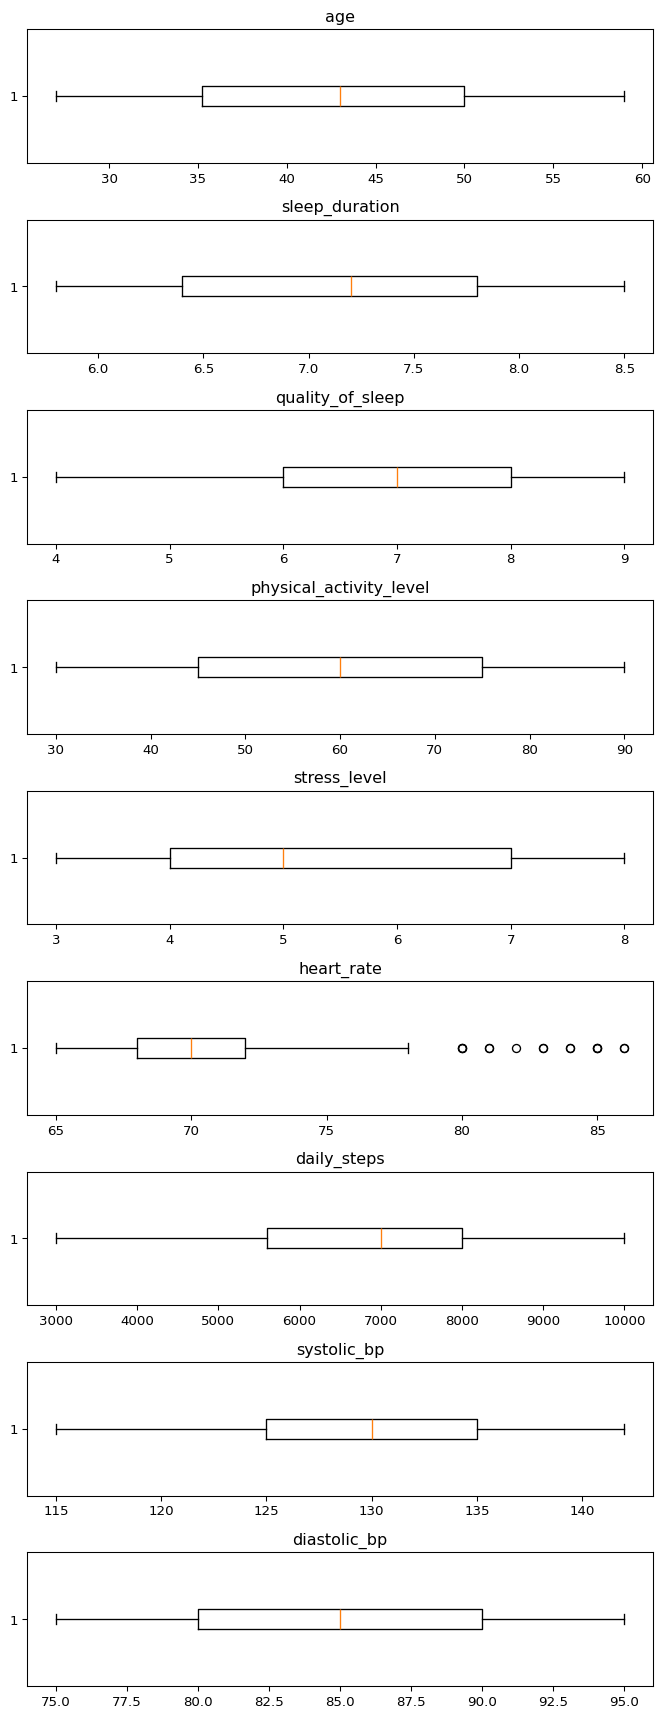

In [59]:
# lets plot numerical columns

import matplotlib.pyplot as plt

numerical_columns = [col for col in df_processed.columns if df_processed[col].dtype in ["int64", "float64"]]

fig, ax = plt.subplots(len(numerical_columns), 1, figsize=(7, 2*len(numerical_columns)), dpi= 96)
for i, col in enumerate(numerical_columns):
    ax[i].boxplot(df_processed[col], vert=False)
    ax[i].set_title(col)
plt.tight_layout()
plt.show()

**now we are going to train a classification model to predict "Stress Level"**

In [55]:
x = df_processed.drop(columns=['stress_level'])
y = df_processed['stress_level']

In [56]:
x.head()

,age,sleep_duration,quality_of_sleep,physical_activity_level,heart_rate,daily_steps,systolic_bp,diastolic_bp,sleep_disorder_Insomnia,sleep_disorder_Sleep Apnea,...,occupation_Nurse,occupation_Sales Representative,occupation_Salesperson,occupation_Scientist,occupation_Software Engineer,occupation_Teacher,bmi_category_Normal Weight,bmi_category_Obese,bmi_category_Overweight,gender_Male
0,27,6.1,6,42,77,4200,126,83,False,False,...,False,False,False,False,True,False,False,False,True,True
1,28,6.2,6,60,75,10000,125,80,False,False,...,False,False,False,False,False,False,False,False,False,True
2,28,6.2,6,60,75,10000,125,80,False,False,...,False,False,False,False,False,False,False,False,False,True
3,28,5.9,4,30,85,3000,140,90,False,True,...,False,True,False,False,False,False,False,True,False,True
4,28,5.9,4,30,85,3000,140,90,False,True,...,False,True,False,False,False,False,False,True,False,True


In [57]:
y.head()

0    6
1    8
2    8
3    8
4    8
Name: stress_level, dtype: int64

In [62]:
#scale the numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = [col for col in x.columns if x[col].dtype in ['int64', 'float64']]
x_normalized = x.copy()
x_normalized[numerical_cols] = scaler.fit_transform(x[numerical_cols])
x_normalized.head()

,age,sleep_duration,quality_of_sleep,physical_activity_level,heart_rate,daily_steps,systolic_bp,diastolic_bp,sleep_disorder_Insomnia,sleep_disorder_Sleep Apnea,...,occupation_Nurse,occupation_Sales Representative,occupation_Salesperson,occupation_Scientist,occupation_Software Engineer,occupation_Teacher,bmi_category_Normal Weight,bmi_category_Obese,bmi_category_Overweight,gender_Male
0,-1.753096,-1.298887,-1.098280,-0.825418,1.654719,-1.619584,-0.330002,-0.268102,False,False,...,False,False,False,False,True,False,False,False,True,True
1,-1.637643,-1.173036,-1.098280,0.039844,1.170474,1.970077,-0.459239,-0.755640,False,False,...,False,False,False,False,False,False,False,False,False,True
2,-1.637643,-1.173036,-1.098280,0.039844,1.170474,1.970077,-0.459239,-0.755640,False,False,...,False,False,False,False,False,False,False,False,False,True
3,-1.637643,-1.550588,-2.771424,-1.402260,3.591698,-2.362273,1.479309,0.869486,False,True,...,False,True,False,False,False,False,False,True,False,True
4,-1.637643,-1.550588,-2.771424,-1.402260,3.591698,-2.362273,1.479309,0.869486,False,True,...,False,True,False,False,False,False,False,True,False,True


In [64]:
# Create a classification model using Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  0  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  1 12  1  0  0]
 [ 0  1  0  8  1  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  1 16]]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        12
           4       0.83      1.00      0.91        10
           5       1.00      0.86      0.92        14
           6       0.89      0.80      0.84        10
           7       0.86      1.00      0.92        12
           8       1.00      0.94      0.97        17

    accuracy                           0.93        75
   macro avg       0.93      0.93      0.93        75
weighted avg       0.94      0.93      0.93        75



In [82]:
# create a categorical classification model using Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  0  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  0 12  2  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 17]]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        10
           5       1.00      0.86      0.92        14
           6       0.83      1.00      0.91        10
           7       1.00      1.00      1.00        12
           8       1.00      1.00      1.00        17

    accuracy                           0.97        75
   macro avg       0.97      0.98      0.97        75
weighted avg       0.98      0.97      0.97        75

